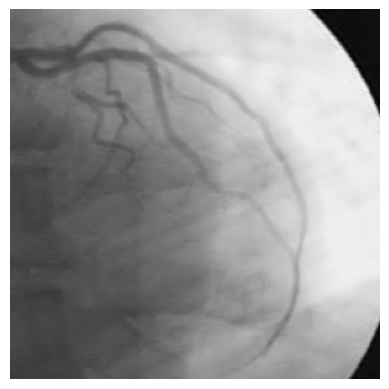

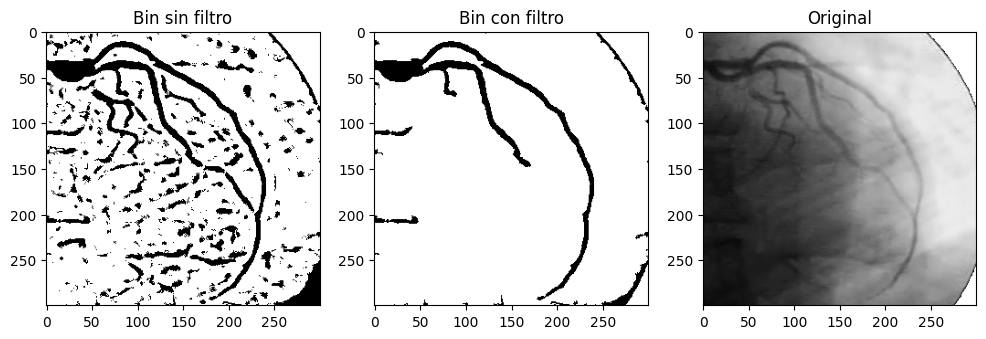

In [71]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Ruta de tu imagen .pgm
filename = 'images/2.pgm'
# Lee la imagen usando OpenCV
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Muestra la imagen
plt.imshow(img, cmap='gray')
plt.axis('off')  # Desactiva los ejes
plt.show()

# Aplicar filtro de mediana
threshold_value = 50  # Umbral para considerar valores muy negros
img[img < threshold_value] = 255

img_median = cv2.medianBlur(img, 5)
img_thresh = cv2.adaptiveThreshold(img_median,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)

# Aplicar la transformación de etiquetas
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_thresh)

# Encontrar el índice del objeto más grande (excluyendo el fondo)
largest_obj_index = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

# Crear una máscara para el objeto más grande
mask = np.zeros_like(labels, dtype=np.uint8)
mask[labels == largest_obj_index] = 255

# Encontrar el contorno del objeto más grande
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = np.zeros_like(mask)
cv2.drawContours(contour_img, contours, -1, (255), thickness=cv2.FILLED)

# Crear una máscara de los píxeles blancos en la imagen 1
mascara_blancos = (img == 255)

# Copiar los píxeles blancos de la imagen 1 a la imagen 2
contour_img[mascara_blancos] = 255

# Mostrar el objeto más grande en un plot de Jupyter
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.imshow(mask, cmap='gray')
plt.title('Bin sin filtro')

plt.subplot(132)
plt.imshow(contour_img, cmap='gray')
plt.title('Bin con filtro')

plt.subplot(133)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.show()